In [1]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from PIL import Image

from skopt import BayesSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/MyDrive/IS4242 Group 1")
!ls

'13 3 meeting.gdoc'
'23 3 Meeting.gdoc'
'Augmented Images'
 codes
'Copy of Copy of Final Traffic_Image_Classification.ipynb'
 Fruit_Image_Classification.ipynb
'Image Processing.ipynb'
 Images
'IS4242 Presentation Group 1.gslides'
'IS4242 Project Outline.pdf'
'Project Ideation.gdoc'
 Report.gdoc
 training_images_seven
 training_images_ten


In [5]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1QXRD8jLfj0PrtuIY29D8kquWN6CZD1Fm/IS4242 Group 1'

In [6]:
def load_data(data_dir, cat):
  flat_data_arr=[] #input array
  target_arr=[] #output array

  #path which contains all the categories of images
  for i in cat:
        
      print(f'loading... category : {i}')
      path=os.path.join(data_dir,i)
      for img in os.listdir(path):
          img_array=imread(os.path.join(path,img))
          img_resized=resize(img_array,(64,64,3))   
          flat_data_arr.append(img_resized.flatten())
          target_arr.append(cat.index(i))
      print(f'loaded category:{i} successfully')
  flat_data=np.array(flat_data_arr)
  target=np.array(target_arr)

  df=pd.DataFrame(flat_data) 
  df['Target']=target
  return df

In [7]:
fruits=['Tomato', 'Orange', 'Banana', 'Apple', 'Lemon', 'Pear', 'Capsicum']

In [16]:
train_df = load_data('codes/data/seven_classes/train', fruits)
#input data 
x_train=train_df.iloc[:,:-1] 
#output data
y_train=train_df.iloc[:,-1]

loading... category : Tomato
loaded category:Tomato successfully
loading... category : Orange
loaded category:Orange successfully
loading... category : Banana
loaded category:Banana successfully
loading... category : Apple
loaded category:Apple successfully
loading... category : Lemon
loaded category:Lemon successfully
loading... category : Pear
loaded category:Pear successfully
loading... category : Capsicum
loaded category:Capsicum successfully


In [17]:
train_df.shape

(105, 12289)

In [10]:
test_df = load_data('codes/data/seven_classes/val', fruits)
#input data 
x_test=test_df.iloc[:,:-1] 
#output data
y_test=test_df.iloc[:,-1]

loading... category : Tomato
loaded category:Tomato successfully
loading... category : Orange
loaded category:Orange successfully
loading... category : Banana
loaded category:Banana successfully
loading... category : Apple
loaded category:Apple successfully
loading... category : Lemon
loaded category:Lemon successfully
loading... category : Pear
loaded category:Pear successfully
loading... category : Capsicum
loaded category:Capsicum successfully


In [18]:
test_df.shape

(35, 12289)

In [19]:
model = svm.SVC()

In [20]:
# Training the model using the training data
model.fit(x_train,y_train)

SVC()

In [21]:
# Testing the model using the testing data
y_pred = model.predict(x_test)
  
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
  
# Print the accuracy of the model
print(f"The model is {accuracy}% accurate")

The model is 0.8% accurate


In [22]:
print(classification_report(y_test, y_pred, target_names=fruits))

              precision    recall  f1-score   support

      Tomato       1.00      1.00      1.00         5
      Orange       1.00      1.00      1.00         5
      Banana       0.60      0.60      0.60         5
       Apple       0.62      1.00      0.77         5
       Lemon       0.83      1.00      0.91         5
        Pear       0.75      0.60      0.67         5
    Capsicum       1.00      0.40      0.57         5

    accuracy                           0.80        35
   macro avg       0.83      0.80      0.79        35
weighted avg       0.83      0.80      0.79        35



In [ ]:
print(confusion_matrix(y_pred,y_test))

[[5 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 1 5 0 0 0]
 [0 0 0 0 4 0 1]
 [0 0 1 0 0 5 0]
 [0 0 0 0 1 0 4]]


In [ ]:
def test_new_img(img): 
  path='Images/test_svm/'+img
  img=imread(path)
  plt.imshow(img)
  plt.show()
  img_resize=resize(img,(64,64))
  l=[img_resize.flatten()]
  probability=model.predict_proba(l)
  for ind,val in enumerate(fruits):
      print(f'{val} = {probability[0][ind]*100}%')
  print("The predicted image is : "+fruits[model.predict(l)[0]])

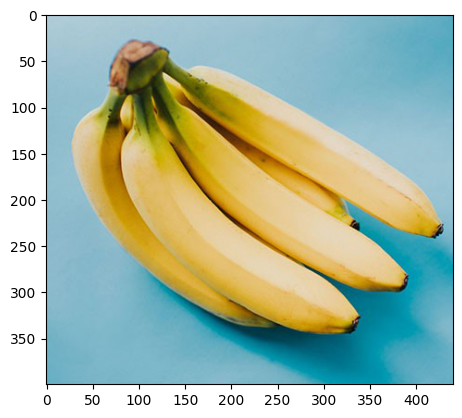

Tomato = 3.226811969470312%
Orange = 0.5700265140676863%
Banana = 62.50782267931957%
Apple = 0.55564721341093%
Lemon = 0.41721777112715147%
Pear = 32.34860342051914%
Capsicum = 0.37387043208516896%
The predicted image is : Banana


In [ ]:
test_new_img('im1.jpeg')

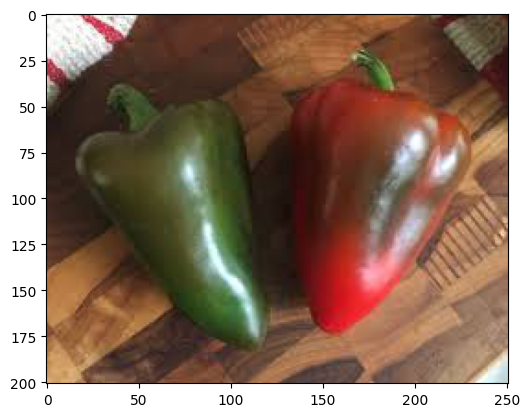

Tomato = 39.48387932228939%
Orange = 1.7209776490425062%
Banana = 4.656080010069369%
Apple = 14.866388095216157%
Lemon = 1.5152522297978586%
Pear = 6.525223795226179%
Capsicum = 31.232198898358487%
The predicted image is : Tomato


In [ ]:
test_new_img('im2.jpeg')

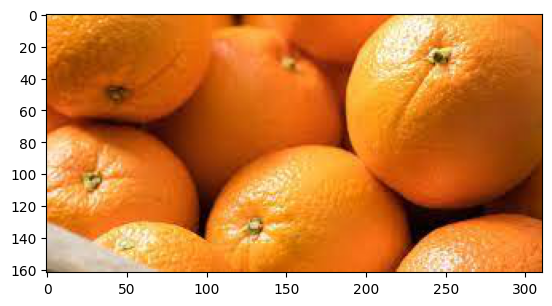

Tomato = 14.109726498722509%
Orange = 8.659628400134022%
Banana = 2.710005941512254%
Apple = 12.336911090799594%
Lemon = 34.52930343572806%
Pear = 17.24779901825703%
Capsicum = 10.406625614846567%
The predicted image is : Lemon


In [ ]:
test_new_img('im3.jpeg')

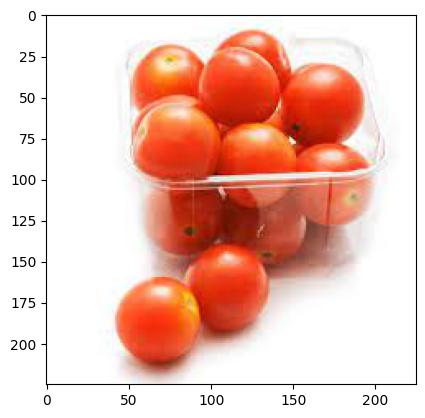

Tomato = 21.916783757908785%
Orange = 1.8985972730890144%
Banana = 6.7850935001106425%
Apple = 1.0887855539066085%
Lemon = 1.4337793184918242%
Pear = 63.23882363522677%
Capsicum = 3.638136961266318%
The predicted image is : Pear


In [ ]:
test_new_img('im4.jpeg')

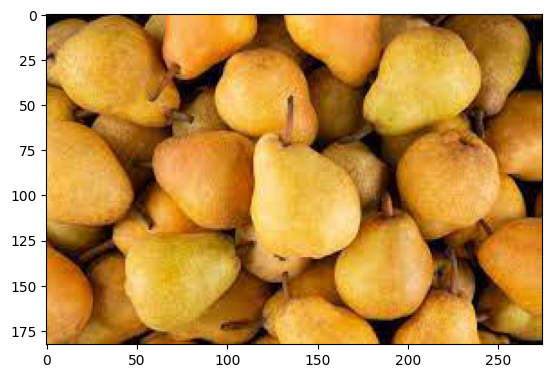

Tomato = 3.8562982662161196%
Orange = 3.4118171289661046%
Banana = 5.133181758071388%
Apple = 24.241183435157858%
Lemon = 32.40254083766182%
Pear = 15.175506770402745%
Capsicum = 15.77947180352398%
The predicted image is : Lemon


In [ ]:
test_new_img('im5.jpeg')

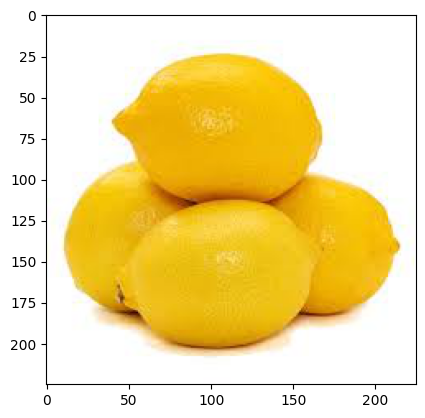

Tomato = 10.373693821989672%
Orange = 1.8347669713171588%
Banana = 6.639021817782274%
Apple = 1.0065072963805168%
Lemon = 1.6198614106965845%
Pear = 75.09988810974552%
Capsicum = 3.426260572088276%
The predicted image is : Pear


In [ ]:
test_new_img('im6.jpeg')

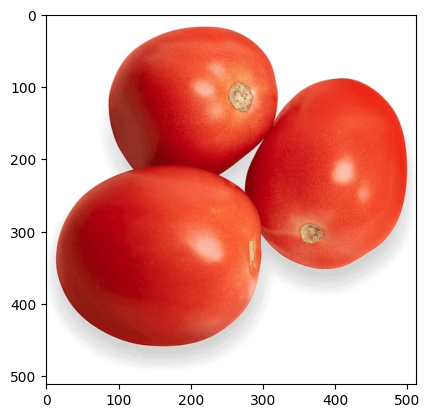

Tomato = 27.61864942962889%
Orange = 1.7847561087705237%
Banana = 5.457774400367466%
Apple = 1.085487840684324%
Lemon = 1.3993766298071122%
Pear = 59.52009906822061%
Capsicum = 3.1338565225210626%
The predicted image is : Pear


In [ ]:
test_new_img('im7.jpeg')

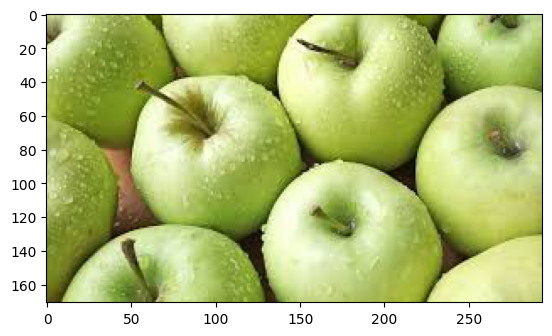

Tomato = 1.7567870698433932%
Orange = 0.7620154610456181%
Banana = 35.240476412530484%
Apple = 5.929531482332045%
Lemon = 3.0541570306686676%
Pear = 51.695286581582025%
Capsicum = 1.5617459619978113%
The predicted image is : Pear


In [ ]:
test_new_img('im8.jpeg')

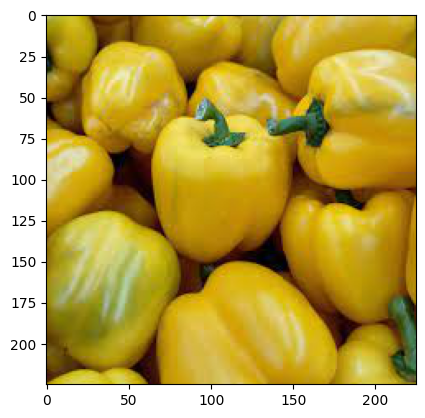

Tomato = 2.21358527275648%
Orange = 1.7295224101109463%
Banana = 2.6303293152221765%
Apple = 7.733669747894413%
Lemon = 68.62069997798483%
Pear = 8.569306626469128%
Capsicum = 8.502886649562019%
The predicted image is : Lemon


In [ ]:
test_new_img('im9.jpeg')

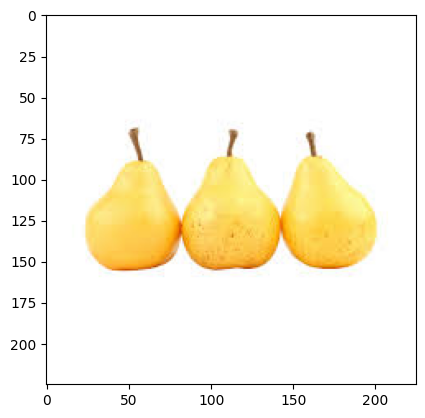

Tomato = 13.902696326801095%
Orange = 3.2679637779713477%
Banana = 12.762780817908336%
Apple = 1.925176020366276%
Lemon = 2.23969569629063%
Pear = 57.24493188895424%
Capsicum = 8.656755471708069%
The predicted image is : Pear


In [ ]:
test_new_img('im10.jpeg')